<h1 style="text-align: center;">Continuous Probability Distributions</h1>
<br>


## Outline of today's lesson:


1. Looking back: A brief review of finite distributions, discrete distributions, and multivariate distributions.
1. Continuous distributions
    1.  Probability density function.
    1.  Cumulative distribution function.
    1.  Examples of continuous distributions.
    1.  Computing and calculating with scipy.stats
1. Looking forward: stochastic processeses, i.e. "infinite dimensional" multivariate discrete/continuous distributions. 

<br>



### <span style="color: green;">Note that in the following discussion we highlight direct applications to machine learning in green!</span>

To start, let's import some libraries we will be using...

In [27]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import IFrame

plt.style.use('ggplot')

%matplotlib widget

## A brief review of _finite_ distributions.  

Let's look at the most simple random variable possible, a Bernoulli random variable, which can only take two values: 0 or 1.  In other words it is like flipping a coin.  The "coin" does not have to be fair.  Consider the _probabily mass function_ for the Bernoulli distribution, sometimes also called the _discrete probability density function_.

$$\text{Pr}(X = k) = 
\begin{cases}
      1-p & k = 0 \\
      p & k=1
\end{cases}
$$

In [28]:
probabilityOfHeads = .3       # not a fair coin!
coinFlip = scipy.stats.bernoulli(probabilityOfHeads)

Calculate the mean and variance:

In [29]:
coinFlip.mean(), coinFlip.var() # variance = p * (1-p)

(0.3, 0.21)

Sample from the Bernoulli a few times:

In [30]:
coinFlip.rvs(size = 3)

array([0, 1, 1], dtype=int64)

Plot the probability mass function:

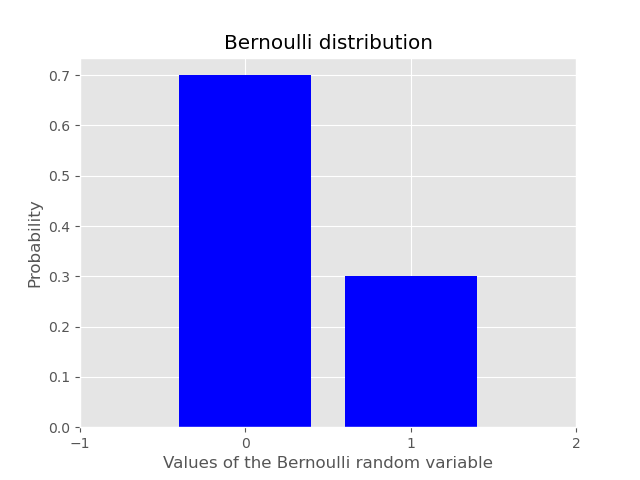

In [48]:
plt.figure()
plt.xlim(-1, 2)
plt.bar([0,1], coinFlip.pmf([0,1]), color='blue')

# For labelling of Bar plot
plt.title('Bernoulli distribution')
plt.xticks(range(-1,3))
plt.xlabel('Values of the Bernoulli random variable')
plt.ylabel('Probability')

plt.show()

### <span style="color: green;">An example of the use of the Bernouilli distribution in machine learning would be a two class classification problem, for example the cats and dogs problem.</span>

Check the SciPy documentation for things you can do with the random variables we explore in this notebook.  Here is the documentation for Bernoulli:

In [6]:
IFrame("https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli", 1100,700)

We can create a general finite random variable using the multinomial distribution with one sample:

In [36]:
nTrial = 1
probs = (.1, .4, .2, .1, .1, .1)

categorical = scipy.stats.multinomial(n=nTrial, p=probs)
categorical.rvs(5)

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

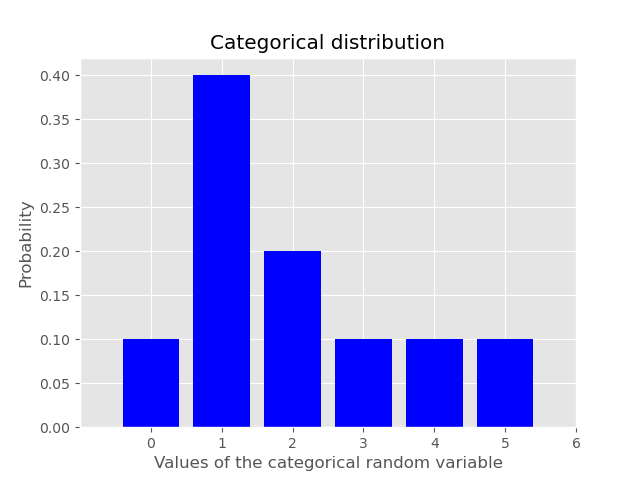

In [50]:
plt.figure()
plt.xlim(-1, 2)

nValues = len(probs)
plt.bar(range(nValues), probs, color='blue')

# For labelling of Bar plot
plt.title('Categorical distribution')
plt.xticks(range(nValues + 1))
plt.xlabel('Values of the categorical random variable')
plt.ylabel('Probability')

plt.show()

### <span style="color: green;">An example of the use of the categorical distribution in machine learning is the distribution over digits in the MNIST problem.</span>

## A brief review of _discrete_ distributions, which generalize finite distributions.  

Consider the probability mass function for the Poisson distribution:

$$\text{Pr}(X = k) = \frac{\mu^k e^{-k}}{k!}  \text{ for k = 0,1,2...}$$

In [14]:
mu = 4  # mu is the only parameter required to specify a Poisson RV and mu turns out to be the mean
poisson = scipy.stats.poisson(mu)

print("Mean: " + str(poisson.mean()))

Mean: 4.0


Even though we only display the probability for the first 20 values of the Poisson distribution, the plot actually "goes to infinity."

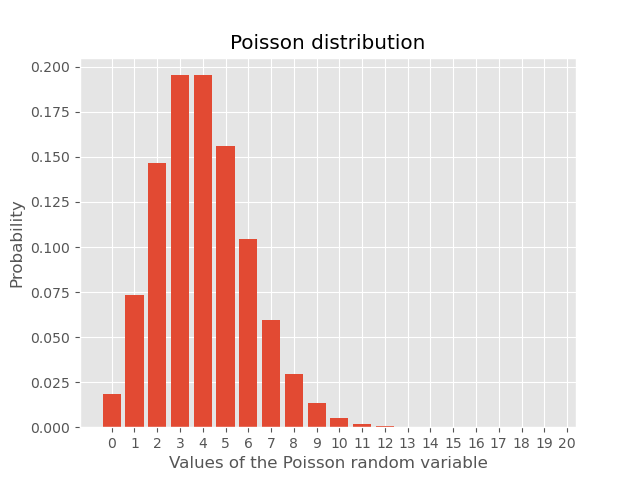

In [16]:
nPoissonValues = 20

valuesOfPoisson = range(nPoissonValues)
partialPMF = poisson.pmf(valuesOfPoisson)

plt.figure()
plt.bar(valuesOfPoisson, partialPMF)

plt.title('Poisson distribution')
plt.xticks(range(21))
plt.xlabel('Values of the Poisson random variable')
plt.ylabel('Probability')

plt.show()

### <span style="color: green;">An example of the use of the Poisson distribution in machine learning is Poisson regression where the mean is linearly dependent on regressors x through coefficients: $$\mu(x) = e^{\theta x}$$ This machine learning example is an example of generalized linear regression and "training" this model means we estimate the coefficient vector $\theta$.  Can you think of a way to use a nonlinear model for the mean $\mu$?  
</span>


## A brief review of _multivariate_ distributions, which give the probabilities for the outcomes of two or more random variables.

For example, toss one fair die and one fair coin independently.  Then $$\text{Pr}(d = 4, c = 1) = \frac{1}{6} \cdot \frac{1}{2} = \frac{1}{12}$$

## Continuous Distributions

##### <span style="color: red;">Warning:  The following discussion is mathematically simplied and if you decide to dig deeper into probability theory you will find that some of the ideas below will have to be modified.</span>

1.  A _continuous_ distribution is a distribution over the real numbers $\mathbb{R}$ in the _univariate_ case or a vector space over the reals in the _multivariate_ case, for example $\mathbb{R}^2$.
1.  The probability for any fixed number is 0!
1.  However _intervals_ on the real line, e.g. [5, 9], may have non-zero probability and can be calculated using the _cumulative distribution function_ or integrating the _probability density function_.
1.  A _cumulative distribution function_ $F$ gives the probability of a real-valued random variable being less than or equal to a given value: $$\text{Pr}(X \leq x) = F(x)$$
1.  A _probability density function_ $f$ gives the probability of a random variable being in an interval through an integral:  $$\text{Pr}(a \leq X \leq b)=\int_{a}^{b}f(x)dx$$
1.  Notice that from the previous two definitions we have:  $$F(x) = \int_{-\infty}^{x}f(t)dt$$
1.  Warning:  There are some distributions that have cumulative distribution functions but NOT density functions.  These distributions are beyond our scope.
1.  Note that density functions can have values greater than 1!  However the _integral_ of a density over any interval is always less than one or equal to 1.  The integral of a density over the entire real line must be equal to 1!

### Uniform Distribution on the interval $[a,b]$:

$$f(x) = 
\begin{cases}
      \frac{1}{b-a} & a\leq x\leq b \\
      0 & \text{otherwise}
\end{cases}
$$
\
$$F(x)=
\begin{cases} 
      0 & x < a \\
      \frac{x-a}{b-a} & a\leq x\leq b \\
      1 & x > b 
   \end{cases}
$$



Plot the uniform density function:

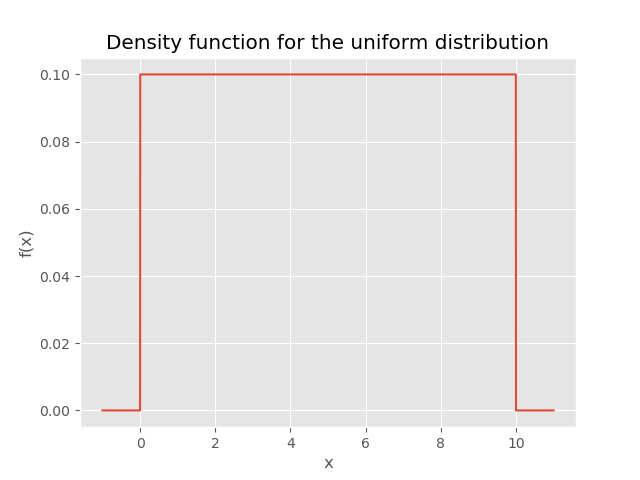

In [40]:
a = 0
b = 10

x = np.linspace(a - 1, b + 1, 5000)
uniformDensity = scipy.stats.uniform.pdf(x, loc=a, scale = b - a)

plt.figure()
plt.plot(x, uniformDensity)
plt.title('Density function for the uniform distribution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Plot the uniform _cumulative_ distribution function:

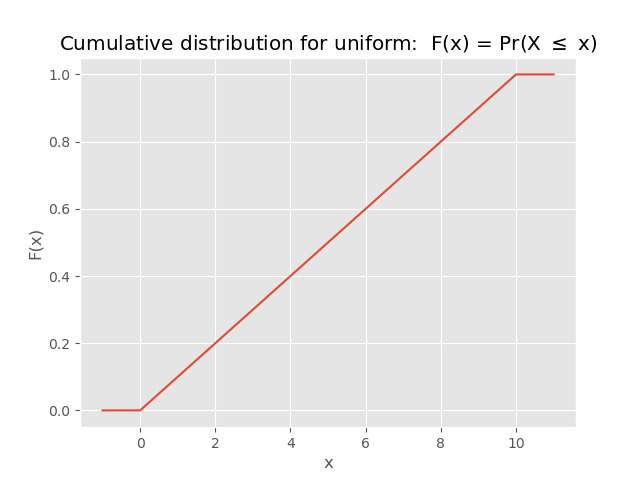

In [46]:
uniformCumulative = scipy.stats.uniform.cdf(x, loc=a, scale = b - a)
plt.figure()
plt.plot(x, uniformCumulative)
plt.title('Cumulative distribution for uniform:  F(x) = Pr(X $\leq$ x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

### Normal Distribution with mean $\mu$ and standard deviation $\sigma$:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

$$F(x) = \text{omitted but check it out on Wikipedia!}$$



Plot the normal density function:

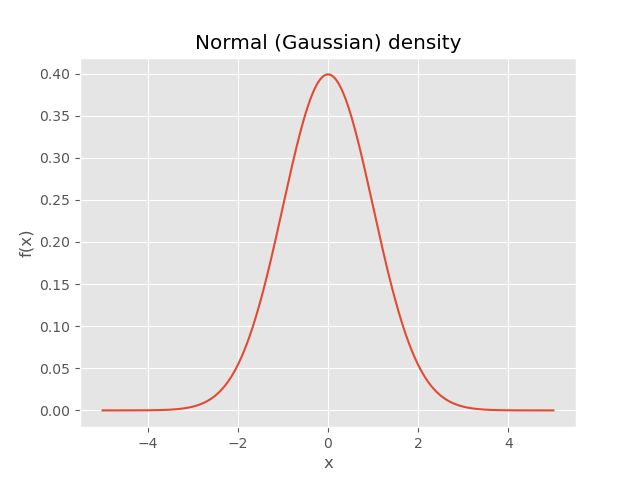

In [26]:
mu = 0
sigma = 1

x = np.linspace(mu - (5 * sigma), mu + (5 * sigma), 5000)
normalDensity = scipy.stats.norm.pdf(x, loc=mu, scale = sigma)

plt.figure()
plt.plot(x, normalDensity)
plt.title('Normal (Gaussian) density')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Plot the Normal cumulative:

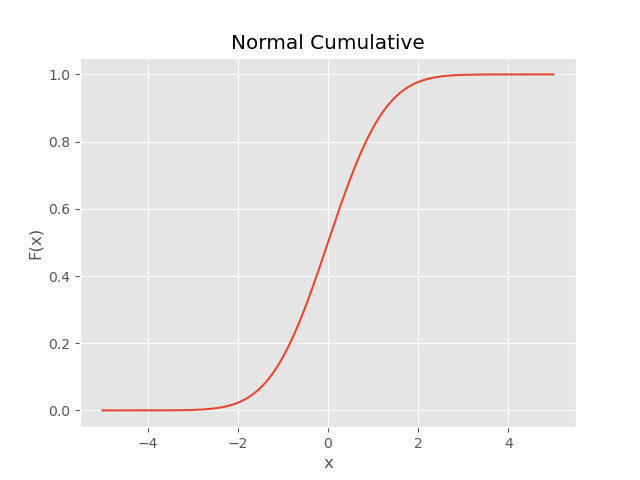

In [21]:
normalCumulative = scipy.stats.norm.cdf(x, loc=mu, scale = sigma)
plt.figure()
plt.plot(x, normalCumulative)
plt.title('Normal Cumulative')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()


###  The normal distribution is not as "obvious" as the uniform distribution.  Where does it come from?  Why do we care about it? Well, the normal distribution is fundamental to the _Central Limit Theorem_! This theorem says that if we have a set of random variables $\{X_i\}$ which are independent and identically distributed ("iid") then the average of the variables $Z = \frac{X_1 + \cdots + X_n}{n}$, which is ALSO a random variable, has a normal distribution.

Plot a _multivariate_ normal density:

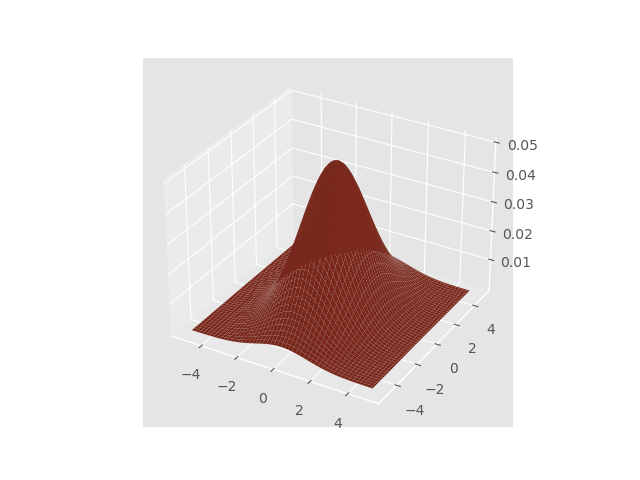

In [22]:
mu = [0.,0]
covarianceMatrix = [[2.0, 0.0], [0.0, 5.0]]

x, y = np.mgrid[mu[0] - 5: mu[0] + 5:.1, mu[1] - 5: mu[1] + 5: .1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = scipy.stats.multivariate_normal(mu, covarianceMatrix)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surface = ax.plot_surface(x, y, rv.pdf(pos))
plt.show()

### There are MANY continuous distributions.  See Wikipedia for a long list.  Our final example will be the Dirichlet distribution which is a distribution over finite distributions!  Instead of looking at formulas, which you can investigate on Wikipedia and elsewhere, we'll try to understand through some images.

In [153]:
IFrame("https://en.wikipedia.org/wiki/File:Dirichlet.pdf", 1000,700)

In [24]:
alpha = [2., 2., 2.]
scipy.stats.dirichlet.rvs(alpha, size = 5)

array([[0.54327555, 0.19149984, 0.26522461],
       [0.34495908, 0.21664428, 0.43839665],
       [0.64195668, 0.12998004, 0.22806327],
       [0.16193397, 0.35690675, 0.48115927],
       [0.20058986, 0.11963247, 0.67977767]])

In [4]:
IFrame("https://chart-studio.plotly.com/~david_avakian/14.embed", 1000, 700)

### <span style="color: green;">In machine learning, the Dirichlet distribution is used in a _topic model_ called _Latent Dirichlet Allocation_.  Topic models are examples of _Bayesian natural language models (NLP)_.  Dirichlet distributions are also used in other Bayesian machine learning models. 
</span>


## Special Bonus Section: Stochastic Processes !

##### <span style="color: red;">Warning: "Stochastic" is just a fancy word for "random."</span>

1.  A stochastic process is, informally, a indexed collection of random variables $\{X_t\}$ where the index $t$ is often interpreted as "time".  There are also "spatial" stochastic processes, for example $\{Z_{(x,y)}\}$.
1.  The stochastic process is called discrete or continous if the index $t$ takes values in $\{0,1,2,...\}$ or if $t$ takes values in $\mathbb{R}$ respectively.

### Let's look at a discrete time, two-dimensional _random walk_:

In [23]:
IFrame("https://en.wikipedia.org/wiki/Random_walk", 1000, 700)

### Continuous time, one-dimensional random walk:

In [99]:
IFrame("https://en.wikipedia.org/wiki/Wiener_process#/media/File:Wiener-process-5traces.svg", 700, 500)